In [15]:
# % pipenv install opencv 

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### 1. OpenCV直方圖！

[[30 30 30 ...  2  3  3]
 [30 30 30 ...  2  3  3]
 [30 30 30 ...  2  3  3]
 ...
 [11 11 12 ...  1  1  1]
 [11 11 11 ...  1  1  1]
 [10 11 11 ...  1  1  1]]


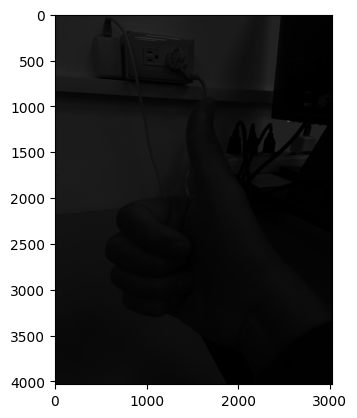

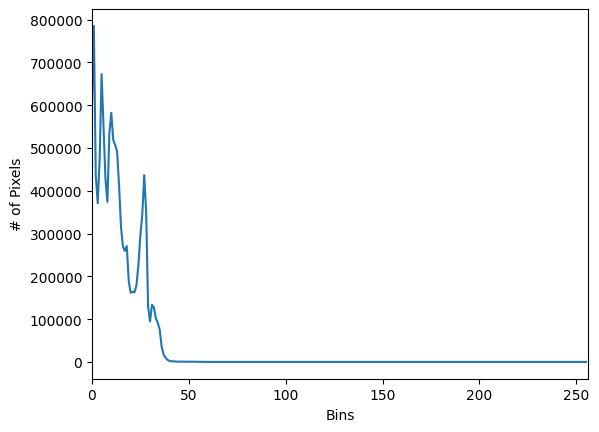

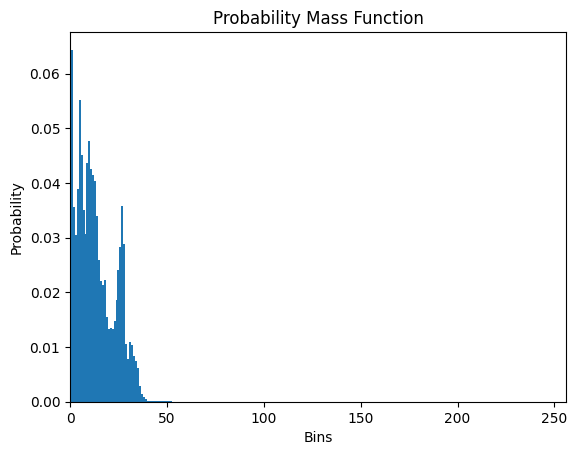

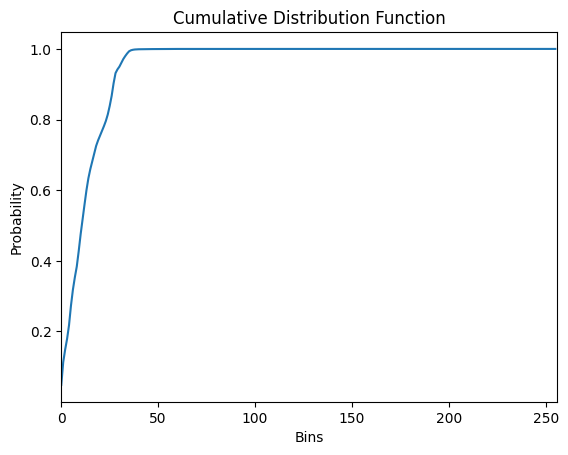

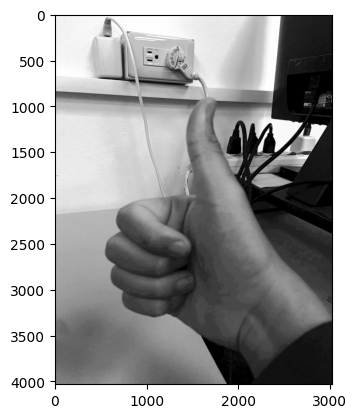

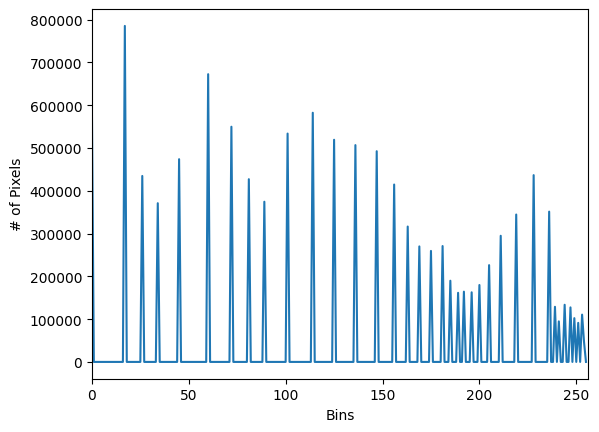

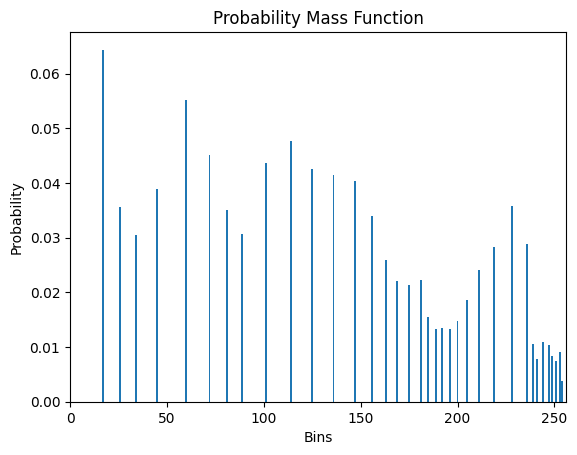

In [32]:
image = cv2.imread("hw1.jpeg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(gray_image)
plt.imshow(gray_image,cmap='gray', vmin=0, vmax=255)
plt.show()
# #cv2直方圖
# plt.hist(gray_image.ravel(),256)
# 計算灰度圖像的直方圖
# cv2.calcHist(images, channels, mask, histSize, ranges)
# images: 原圖像圖像格式為 uint8 或 float32。當傳入函數時應該用中括號括起來，例如：[img]。
# channels: 同樣用中括號括起來的通道數。如果輸入圖像是灰度圖，它的值就是 [0]；如果是彩色圖像的話，可以傳入 [0]，[1] 或者 [2] 來計算藍色，綠色或紅色通道的直方圖。
# mask: 掩模圖像。要計算整個圖像的直方圖就給為 None。但是如果你想計算圖像某一部分的直方圖的話，你就需要製作一個掩模圖像，並使用它。
# histSize: BIN 的數目。也應該用中括號括起來，例如：[256]。
# ranges: 像素值範圍，通常為 [0,256]。
hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
plt.figure()
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()
# 計算並顯示概率質量函數（PMF）
pmf = hist / sum(hist)
plt.figure()
plt.title("Probability Mass Function")
plt.xlabel("Bins")
plt.ylabel("Probability")
plt.bar(range(256), pmf[:, 0], width=1.0)  # 確保pmf為一維
plt.xlim([0, 256])
plt.show()
# 計算累積分佈函數
cdf = np.cumsum(pmf)
plt.figure()
plt.title("Cumulative Distribution Function")
plt.xlabel("Bins")
plt.ylabel("Probability")
plt.plot(cdf)
plt.xlim([0, 256])
plt.show()
# 換出轉移曲線 cdf[gray_image[height, width]] * (255-9)


# 找到換算的亮度 = CDF(輸入灰階亮度) 乘上 整理寬度 (0-255) 
# pmf 是指該個亮度在整體的佔比
# cdf 是指小於該個亮度在整體的佔比 
# 創建一個新的二維陣列儲存圖片轉換結果
# 正規化 CDF
cdf_min = cdf[0]
cdf_max = cdf[-1]
cdf_normalized = (cdf - cdf_min) / (cdf_max - cdf_min) * 255
new_ = np.zeros_like(gray_image)
height, width = gray_image.shape

# 修改循環變量名以避免重名
for w in range(width):
    for h in range(height):
        # 使用正規化後的 CDF 進行映射
        new_[h, w] = cdf_normalized[gray_image[h, w]]

#顯示圖片結果 
plt.figure()
plt.imshow(new_, cmap='gray',vmin=0, vmax=255)
plt.show()
# 顯示圖片概率質量函數
# 計算並顯示概率質量函數（PMF）
hist = cv2.calcHist([new_], [0], None, [256], [0, 256])
plt.figure()
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()
# 計算並顯示概率質量函數（PMF）
pmf = hist / sum(hist)
plt.figure()
plt.title("Probability Mass Function")
plt.xlabel("Bins")
plt.ylabel("Probability")
plt.bar(range(256), pmf[:, 0], width=1.0)  # 確保pmf為一維
plt.xlim([0, 256])
plt.show()

### 2. opencv直方圖